In [2]:
# Import packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pickle
import math as math
from matplotlib import gridspec
import os
import seaborn as sns
%matplotlib inline

In [2]:
#Set figure style

%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

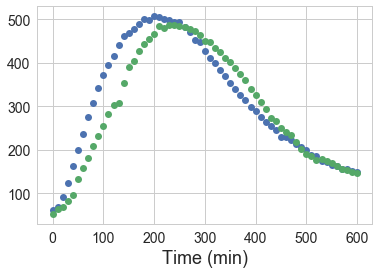

In [3]:
# Import new experimental data
nM50 = [60.55,68.05,91.63,124.12,162.77,199.98,235.95,275.76,306.61,342.68,371.39,395.47,415.54,440.71,460.51,468.86,476.87,489.47,501.48,
       498.13,506.96,504.41,501.33,497.49,494.82,492.93,482.36,470.72,453.14,446.86,427.57,410.76,398.97,383.22,368.43,352.29,340.64,325.71,
       314.46,298.40,289.65,275.76,263.91,253.96,245.26,228.64,229.02,221.40,213.77,205.34,198.57,188.45,184.43,174.14,172.85,164.66,161.65,
       156.73,154.97,150.17,148.03]
nM10 = [52.37,64.09,68.76,81.22,96.51,131.94,157.46,181.69,208.44,230.47,254.00,281.02,302.55,308.57,353.65,389.13,404.84,427.85,441.99,
        454.75,466.42,484.83,480.48,487.02,487.67,484.46,482.84,478.24,473.97,462.81,451.09,447.95,433.21,424.06,410.19,400.89,388.21,
        373.83,359.52,340.77,325.40,309.52,292.74,273.42,266.22,250.70,241.10,232.92,217.10,202.53,190.67,184.66,176.28,179.10,173.97,
        168.70,161.86,156.71,153.19,148.51,147.18] 
comptime = np.linspace(0,600,61)
plt.plot(comptime,nM50,'o',comptime,nM10,'o')
plt.xlabel('Time (min)')

In [3]:
# Import fitting data
# Periodic
filename = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/experimentaldata_scaled.pickled'
data_to_score_against = filename
with open(filename, 'rb') as f:
    syntheticdata = pickle.load(f)
periodic_time, periodic_data = syntheticdata

In [8]:
periodic_data[1]

[0.14520328299232327,
 0.15210184000345864,
 0.1837146449937906,
 0.24973574498919943,
 0.3495915709356032,
 0.4387236100702279,
 0.5234587769550058,
 0.6148905800901248,
 0.6390302520658149,
 0.6844395660130148,
 0.6360975659332558,
 0.663963840099852,
 0.7331053620294725,
 0.839991691938001,
 0.9121059849351502,
 0.9673669940494677,
 1.00000000004147,
 0.9876193380103535,
 0.9781832330550043,
 0.9586267989057694,
 0.8629138819605227,
 0.8739334039482224,
 0.8587272509138687,
 0.8970775750725148,
 0.8894936899584502,
 0.8846598560253067,
 0.8988453739726537,
 0.8487818629833405,
 0.7930833760938216,
 0.7589421100676152,
 0.7600655059161344,
 0.7538946810596191,
 0.7586089730540528,
 0.8338919079926883,
 0.8206417069916555,
 0.7975796419631789,
 0.7572899651032501,
 0.6958549850245537,
 0.6525066900088549,
 0.6284251500115745,
 0.606174360100578,
 0.6061378390819046,
 0.6607774870204639,
 0.668646745039278,
 0.633480152030676,
 0.6156500830407281,
 0.5526066170090379,
 0.50053131300817

In [5]:
# Import 10nM periodic data
d90 = [0.239,0.237,0.257,0.328,0.412,0.502,0.639,0.715,0.762,0.779,0.751,0.724,0.747,0.789,0.849,0.940,0.947,0.972,0.948,0.916,0.896,
       0.873,0.877,0.893,0.919,0.937,0.973,0.928,0.955,0.908,0.865,0.838,0.831,0.820,0.852,0.866,0.868,0.838,0.788,0.737,0.698,0.664,
       0.670,0.700,0.709,0.719,0.673,0.628,0.599,0.560,0.550,0.564,0.607,0.639,0.633,0.606,0.579,0.543]
t90 = np.linspace(0,len(d90)*10-10,len(d90))
d120 = [0.254,0.253,0.261,0.309,0.403,0.505,0.618,0.693,0.758,0.856,0.900,0.934,0.910,0.888,0.851,0.823,0.804,0.807,0.811,0.881,0.929,
        0.974,1.000,0.955,0.901,0.875,0.803,0.728,0.704,0.711,0.724,0.760,0.808,0.852,0.836,0.801,0.744,0.680,0.620,0.593,0.581,0.580,
        0.610,0.650,0.695,0.714,0.691,0.652,0.593,0.605,0.544,0.507,0.511]
t120 = np.linspace(0,len(d120)*10-10,len(d120))
d150 = [0.204,0.211,0.226,0.266,0.316,0.378,0.440,0.514,0.602,0.668,0.736,0.775,0.816,0.834,0.840,0.820,0.786,0.772,0.756,0.769,0.793,
        0.830,0.861,0.921,0.963,0.983,1.000,0.970,0.922,0.844,0.782,0.732,0.710,0.719,0.714,0.725,0.732,0.727,0.751,0.768,0.759,0.744,
        0.705,0.658,0.605,0.569,0.542,0.539,0.534,0.544,0.555,0.551,0.572,0.588,0.601,0.613,0.599,0.581,0.541,0.499]
t150 = np.linspace(0,len(d150)*10-10,len(d150))
d180 = [0.177,0.185,0.227,0.261,0.361,0.362,0.470,0.563,0.654,0.760,0.831,0.899,0.881,0.944,0.959,0.918,0.860,0.810,0.761,0.702,0.699,
        0.689,0.681,0.721,0.740,0.797,0.884,0.927,0.975,0.986,0.959,0.951,0.853,0.768,0.677,0.621,0.570,0.530,0.516,0.506,0.514,0.515,
        0.550,0.566,0.605,0.623,0.646,0.671,0.690,0.683,0.637,0.577,0.520,0.473,0.422,0.384,0.360,0.364,0.382,0.424,0.451]
t180 = np.linspace(0,len(d180)*10-10,len(d180))
d240 = [0.149,0.149,0.155,0.161,0.180,0.230,0.287,0.368,0.428,0.509,0.579,0.661,0.736,0.809,0.874,0.928,0.974,1.000,0.966,0.947,0.855,
        0.775,0.692,0.620,0.552,0.511,0.475,0.451,0.444,0.453,0.465,0.487,0.517,0.569,0.629,0.688,0.739,0.766,0.802,0.845,0.871,0.858,
        0.808,0.741,0.652,0.553,0.481,0.428,0.393,0.376,0.351,0.323,0.311,0.303,0.320,0.349,0.391,0.437,0.488,0.542,0.583,0.616,0.647]
t240 = np.linspace(0,len(d240)*10-10,len(d240))
d320 = [0.148,0.150,0.151,0.164,0.201,0.258,0.307,0.355,0.404,0.480,0.549,0.602,0.668,0.736,0.785,0.831,0.875,0.917,0.967,0.998,0.998,
        0.974,0.913,0.810,0.706,0.622,0.570,0.528,0.488,0.445,0.405,0.372,0.332,0.309,0.285,0.278,0.293,0.310,0.324,0.341,0.361,0.382,
        0.409,0.428,0.447,0.460,0.478,0.490,0.493,0.513,0.521,0.521,0.503,0.466,0.423,0.379,0.332,0.297,0.285,0.267,0.250]
t320 = np.linspace(0,len(d320)*10-10,len(d320))

0.029889480020251102


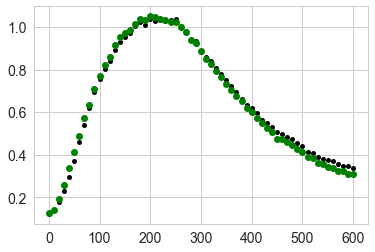

In [6]:
# Scale constant 50nM to fitting data
sf = 0.002073
nM50_sc = []
nM10_sc = []
err = []
for i in range(len(nM50)): 
    nM50_sc.append(nM50[i]*sf)
    err=+(abs(nM50_sc[i]-periodic_data[0][i]))
    nM10_sc.append(nM10[i]*sf)
plt.plot(periodic_time[0], periodic_data[0], 'ko', markersize=5)
plt.plot(comptime, nM50_sc, 'go')
print(err)

0.0018147699999999378


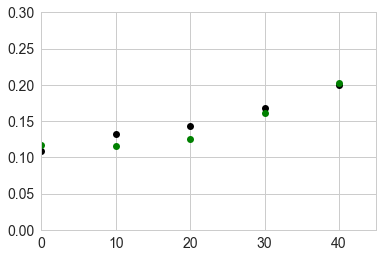

In [7]:
# Scale 90 min period
sf = 0.49
d90_sc = []
err = []
for i in range(len(d90)): 
    d90_sc.append(d90[i]*sf)
    if t90[i] <= 45:
        err=+(abs(nM10_sc[i]-d90_sc[i]))
plt.plot(comptime, nM10_sc, 'ko')
plt.plot(t90, d90_sc, 'go')
plt.xlim([0,45])
plt.ylim([0,0.3])
print(err)

0.0011254199999999326


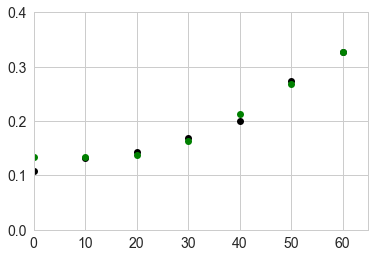

In [8]:
# Scale 120 min period
sf = 0.53
d120_sc = []
err = []
for i in range(len(d120)): 
    d120_sc.append(d120[i]*sf)
    if t120[i] <= 60:
        err=+(abs(nM10_sc[i]-d120_sc[i]))
plt.plot(comptime, nM10_sc, 'ko')
plt.plot(t120, d120_sc, 'go')
plt.xlim([0,65])
plt.ylim([0,0.4])
print(err)

0.0014233700000000349


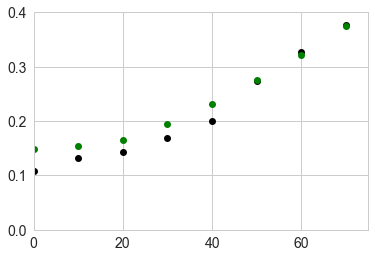

In [9]:
# Scale 150 min period
sf = 0.73
d150_sc = []
err = []
for i in range(len(d150)): 
    d150_sc.append(d150[i]*sf)
    if t150[i] <= 75:
        err=+(abs(nM10_sc[i]-d150_sc[i]))
plt.plot(comptime, nM10_sc, 'ko')
plt.plot(t150, d150_sc, 'go')
plt.xlim([0,75])
plt.ylim([0,0.4])
print(err)

0.014164310000000013


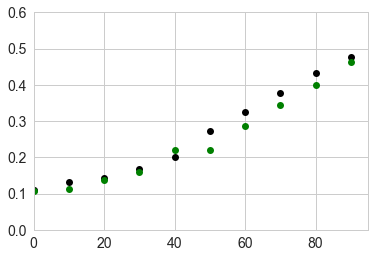

In [10]:
# Scale 180 min period
sf = 0.61
d180_sc = []
err = []
for i in range(len(d180)): 
    d180_sc.append(d180[i]*sf)
    if t180[i] <= 90:
        err=+(abs(nM10_sc[i]-d180_sc[i]))
plt.plot(comptime, nM10_sc, 'ko')
plt.plot(t180, d180_sc, 'go')
plt.xlim([0,95])
plt.ylim([0,0.6])
print(err)

0.005773849999999858


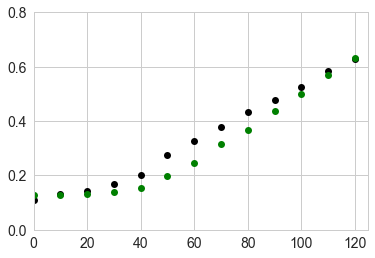

In [11]:
# Scale 240 min period
sf = 0.86
d240_sc = []
err = []
for i in range(len(d240)): 
    d240_sc.append(d240[i]*sf)
    if t240[i] <= 120:
        err=+(abs(nM10_sc[i]-d240_sc[i]))
plt.plot(comptime, nM10_sc, 'ko')
plt.plot(t240, d240_sc, 'go')
plt.xlim([0,125])
plt.ylim([0,0.8])
print(err)

0.0007666799999999085


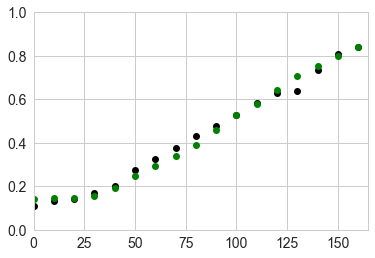

In [12]:
# Scale 320 min period
sf = 0.96
d320_sc = []
err = []
for i in range(len(d320)): 
    d320_sc.append(d320[i]*sf)
    if t320[i] <= 160:
        err=+(abs(nM10_sc[i]-d320_sc[i]))
plt.plot(comptime, nM10_sc, 'ko')
plt.plot(t320, d320_sc, 'go')
plt.xlim([0,165])
plt.ylim([0,1])
print(err)

In [13]:
times = []
times.append(comptime)
times.append(t90)
times.append(t120)
times.append(t150)
times.append(t180)
times.append(t240)
times.append(t320)

data = []
data.append(nM50_sc)
data.append(d90_sc)
data.append(d120_sc)
data.append(d150_sc)
data.append(d180_sc)
data.append(d240_sc)
data.append(d320_sc)

In [14]:
scorefxn_arr = [times, data]
import pickle
filename = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/Mating-Model/Data/Experimental Data/10nM periodic.pickled'
pickle.dump(scorefxn_arr, open(filename, 'wb'))

In [15]:
max(nM10_sc)/max(nM50_sc)

0.9619496607227395

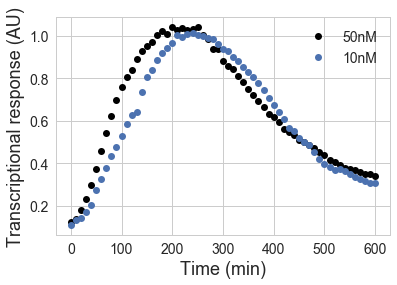

In [21]:
plt.plot(periodic_time[0],periodic_data[0],'ko')
plt.plot(comptime,nM10_sc,'o')
plt.xlabel('Time (min)')
plt.ylabel('Transcriptional response (AU)')
plt.legend(['50nM','10nM'])
plt.savefig('Constant Comparison.png')